In [111]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import os
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
# get content from url: replace HTM by filter (it is the URL of "toc)
r = requests.get('http://isa.epfl.ch/imoniteur_ISAP/%21gedpublicreports.filter?ww_i_reportmodel=133685247')
r.content

b'<html><head><META http-equiv="Content-Type" content="text/html; charset=iso-8859-1"><div></div><title></title><script type="text/javascript" src="GEDPUBLICREPORTS.txt?ww_x_path=Gestac.Base.Palette_js&amp;ww_c_langue=fr"></script><link rel="stylesheet" type="text/css" href="GEDPUBLICREPORTS.css?ww_x_path=Gestac.Moniteur.Style"><link rel="stylesheet" type="text/css" href="GEDPUBLICREPORTS.css?ww_x_path=Gestac.Moniteur.StyleNavigator"></head><body bgcolor="#ffffff" marginheight="0" marginwidth="5" link="#666666" vlink="#666666" alink="#666666"><div class="filtres"><form method="GET" name="f" action="!GEDPUBLICREPORTS.filter"><input type="hidden" name="ww_b_list" value="1"><input type="hidden" name="ww_i_reportmodel" value="133685247"><input type="hidden" name="ww_c_langue" value=""><h1 id="titre">Liste des \xe9tudiants inscrits par semestre</h1><table border="0" id="format"><tr><th>Format:</th></tr><tr><td><input type="radio" name="ww_i_reportModelXsl" value="133685270" checked>html</td

In [39]:
soup = BeautifulSoup(r.content)#get the tree with beatifulsoup
print(soup.prettify()) # present the url content in a nice way

<html>
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
 </head>
 <body>
  <div>
  </div>
  <title>
  </title>
  <script src="GEDPUBLICREPORTS.txt?ww_x_path=Gestac.Base.Palette_js&amp;ww_c_langue=fr" type="text/javascript">
  </script>
  <link href="GEDPUBLICREPORTS.css?ww_x_path=Gestac.Moniteur.Style" rel="stylesheet" type="text/css"/>
  <link href="GEDPUBLICREPORTS.css?ww_x_path=Gestac.Moniteur.StyleNavigator" rel="stylesheet" type="text/css"/>
  <div class="filtres">
   <form action="!GEDPUBLICREPORTS.filter" method="GET" name="f">
    <input name="ww_b_list" type="hidden" value="1"/>
    <input name="ww_i_reportmodel" type="hidden" value="133685247"/>
    <input name="ww_c_langue" type="hidden" value=""/>
    <h1 id="titre">
     Liste des étudiants inscrits par semestre
    </h1>
    <table border="0" id="format">
     <tr>
      <th>
       Format:
      </th>
     </tr>
     <tr>
      <td>
       <input checked="" name="ww_i_reportModelXsl" type="r

/Users/lugrinclaire/anaconda/lib/python3.5/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 184 of the file /Users/lugrinclaire/anaconda/lib/python3.5/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [40]:
# find the options we can put in the request
soup.find_all('option')

[<option value="null"></option>,
 <option value="942293">Architecture</option>,
 <option value="246696">Chimie et génie chimique</option>,
 <option value="943282">Cours de mathématiques spéciales</option>,
 <option value="637841336">EME (EPFL Middle East)</option>,
 <option value="942623">Génie civil</option>,
 <option value="944263">Génie mécanique</option>,
 <option value="943936">Génie électrique et électronique </option>,
 <option value="2054839157">Humanités digitales</option>,
 <option value="249847">Informatique</option>,
 <option value="120623110">Ingénierie financière</option>,
 <option value="946882">Management de la technologie</option>,
 <option value="944590">Mathématiques</option>,
 <option value="945244">Microtechnique</option>,
 <option value="945571">Physique</option>,
 <option value="944917">Science et génie des matériaux</option>,
 <option value="942953">Sciences et ingénierie de l'environnement</option>,
 <option value="945901">Sciences et technologies du vivant</op

In [41]:
#Create a dictionnary with the name and the code for each option
request_dict={}
for op in soup.find_all('option'):
    name = str(op.string)
    value = op.attrs['value']
    request_dict[name]=value
request_dict

{'2007-2008': '978181',
 '2008-2009': '978187',
 '2009-2010': '978195',
 '2010-2011': '39486325',
 '2011-2012': '123455150',
 '2012-2013': '123456101',
 '2013-2014': '213637754',
 '2014-2015': '213637922',
 '2015-2016': '213638028',
 '2016-2017': '355925344',
 'Architecture': '942293',
 'Bachelor semestre 1': '249108',
 'Bachelor semestre 2': '249114',
 'Bachelor semestre 3': '942155',
 'Bachelor semestre 4': '942163',
 'Bachelor semestre 5': '942120',
 'Bachelor semestre 5b': '2226768',
 'Bachelor semestre 6': '942175',
 'Bachelor semestre 6b': '2226785',
 'Chimie et génie chimique': '246696',
 'Cours de mathématiques spéciales': '943282',
 'EME (EPFL Middle East)': '637841336',
 'Génie civil': '942623',
 'Génie mécanique': '944263',
 'Génie électrique et électronique ': '943936',
 'Humanités digitales': '2054839157',
 'Informatique': '249847',
 'Ingénierie financière': '120623110',
 'Management de la technologie': '946882',
 'Master semestre 1': '2230106',
 'Master semestre 2': '9421

In [44]:
# DOWNLOAD THE DATA

#there are stable blocks in the URL and some values we need to choose
# for the one we need to chose we get the codes from the dictionnary for each option

#Stable blocks of the URLwe set the GPS to -1 because it is always different and we never have the information on this number, -1 works
unit_ac_block='http://isa.epfl.ch/imoniteur_ISAP/!GEDPUBLICREPORTS.html?ww_x_GPS=-1&ww_i_reportModel=133685247&ww_i_reportModelXsl=133685270&ww_x_UNITE_ACAD='
periode_ac_block='&ww_x_PERIODE_ACAD='
periode_pedago_block='&ww_x_PERIODE_PEDAGO='
hivers_block='&ww_x_HIVERETE='

# variable blocks of the URL to be taken from the dictionnary: 

#choose the section
unit_ac='Informatique'# we only work with informatique section data

#choose bachelor or master
diplome='Master'

#choose the semester: 1 to 6 for Bachelor (5b and 6b seem empty) and 1 to 3 for masters
sem='1'

# compute the pedagogic period

#for the normal semesters:
#periode_pedago= diplome+' semestre '+sem

#for the masters project:
periode_pedago='Projet Master automne'

#compute the type of semester (semester 1 and 3 are always autumn and semesters 2 and 4 are always spring)
if sem=='1' or sem=='3' or sem=='5':
    hivers= 'Semestre d\'automne'
else:
    hivers= 'Semestre de printemps'
print(hivers)

#Warning: there are 2 codes for "semestre de printemps" and "semestre printemps" the good ones are
# "d'automne" and "de printemps", the others are for erasmus students that we chose not to analyse
# because they didn't study the whole curiculum at epfl

# Loop thought the academic period to get all the data for this pedagogic period 
for i in range(2007,2017):
    #compute the academic period
    periode_ac=str(i)+'-'+str(i+1)
    print(periode_ac)
    
    # write the url
    url=unit_ac_block+request_dict[unit_ac]+periode_ac_block+request_dict[periode_ac]+periode_pedago_block+request_dict[periode_pedago]+hivers_block+request_dict[hivers]

    #check that the url works
    print(url)
    
    #Import the URL and define the header and the column index
    # warning import html returns a list of data frame we only keep the 1st one (the others are empty)
    data=pd.read_html(url,header=1,index_col=10)[0]
    data.head()
    
    #save the data:
    
    #write the title for the file:
    
    #for the normal semesters:
    #title= diplome+'_sem_'+sem+'_'+periode_ac
    
    #for the masters projects:
    title=periode_pedago+periode_ac

    print(title)
    
    #save:
    data.to_pickle(title)

# The tables for the masters project in the spring were empty after 2014 hence we didn't load them


Semestre d'automne
2007-2008
http://isa.epfl.ch/imoniteur_ISAP/!GEDPUBLICREPORTS.html?ww_x_GPS=-1&ww_i_reportModel=133685247&ww_i_reportModelXsl=133685270&ww_x_UNITE_ACAD=249847&ww_x_PERIODE_ACAD=978181&ww_x_PERIODE_PEDAGO=249127&ww_x_HIVERETE=2936286
Projet Master automne2007-2008
2008-2009
http://isa.epfl.ch/imoniteur_ISAP/!GEDPUBLICREPORTS.html?ww_x_GPS=-1&ww_i_reportModel=133685247&ww_i_reportModelXsl=133685270&ww_x_UNITE_ACAD=249847&ww_x_PERIODE_ACAD=978187&ww_x_PERIODE_PEDAGO=249127&ww_x_HIVERETE=2936286
Projet Master automne2008-2009
2009-2010
http://isa.epfl.ch/imoniteur_ISAP/!GEDPUBLICREPORTS.html?ww_x_GPS=-1&ww_i_reportModel=133685247&ww_i_reportModelXsl=133685270&ww_x_UNITE_ACAD=249847&ww_x_PERIODE_ACAD=978195&ww_x_PERIODE_PEDAGO=249127&ww_x_HIVERETE=2936286
Projet Master automne2009-2010
2010-2011
http://isa.epfl.ch/imoniteur_ISAP/!GEDPUBLICREPORTS.html?ww_x_GPS=-1&ww_i_reportModel=133685247&ww_i_reportModelXsl=133685270&ww_x_UNITE_ACAD=249847&ww_x_PERIODE_ACAD=39486325&ww_

In [94]:
# ANALYSIS OF THE BACHELOR DATA: Build the dataframe
Data_Bachelor=pd.DataFrame([])
#load the data
for i in range(2007,2017):
    #compute the academic period
    periode_ac=str(i)+'-'+str(i+1)

    # define the semester

    for sem in range(1,7):

        Data=pd.read_pickle('Bachelor_sem_'+str(sem)+'_'+periode_ac)

        #add columns with the year and type of semester
        Data['Year']=periode_ac
        Data['Semester']=sem
        #concatenate with the previously loaded data
        Data_Bachelor=pd.concat([Data_Bachelor,Data])
#reshape the data: keep only interesting information
Data_Bachelor=Data_Bachelor.drop(Data_Bachelor.columns[[2,3,4,5,6,7,8,9,10]],axis=1)
Data_Bachelor=Data_Bachelor.reset_index()
Data_Bachelor

,No Sciper,Civilité,Nom Prénom,Year,Semester
0,169569,Monsieur,Arévalo Christian,2007-2008,1
1,174905,Monsieur,Aubelle Flavien,2007-2008,1
2,173922,Monsieur,Badoud Morgan,2007-2008,1
3,179406,Monsieur,Baeriswyl Jonathan,2007-2008,1
4,179428,Monsieur,Barroco Michael,2007-2008,1
5,179324,Monsieur,Belfis Nicolas,2007-2008,1
6,174597,Monsieur,Beliaev Stanislav,2007-2008,1
7,179449,Monsieur,Bindschaedler Vincent,2007-2008,1
8,178553,Monsieur,Bloch Marc-Olivier,2007-2008,1
9,179426,Monsieur,Bloch Remi,2007-2008,1


In [102]:
# Group the data by sciper number: one sciper identifies one person.
#when we group we will have the info on all the semesters each person took
Grouped_data=Data_Bachelor.groupby(['No Sciper'])

#The basic statistics give us the number of semester the person did (in count), the 1st semester he did
# (in min) and the last semester he did (in max)
Stats=Grouped_data.describe()


def get_civilite(NoSciper,Data):
    # Function to obtain the sex of a given student 
    Data= Data.rename(columns= {'No Sciper':'NoSciper'}) # Rename column not to have blanks
    civilite = np.array(Data[Data.NoSciper == student].Civilité)[0]
    return civilite
    
# Create empty data frame where we will put all info about students that have completed their bachelors
Data_Bachelor_Clean = pd.DataFrame() 

# Extract information (study duration and sex) of students that have finished their problems
all_students = set(Data_Bachelor['No Sciper'])  # get a list of all the students (unique list, so no student ids are repeated)
for student in all_students:  # iterate across all students
    if type(student) == int or type(student)==str:  # not do analysis if sciper is NaN
        student_info = Stats.loc[student] # get stats info about a given student (counts, mean...)
        # if max registered semester is 6 and min registered semester is 1, obtain infor about student
        # some students appeared to have started at semester 1 and finished at semester 6
        # but only stayed 4 semester. We don't have enough information about them so we removed tehm
        if (float(student_info.loc['max'] == 6)) and (float(student_info.loc['min'] == 1) and float(student_info.loc['count'] >= 6)):
            student_DF = pd.DataFrame({'No Sciper': student, 'Durée':student_info.loc['count'], 'Civilité': get_civilite(student,Data_Bachelor)})
            Data_Bachelor_Clean = Data_Bachelor_Clean.append(student_DF) # append dataframe of student to general data frame 

Data_Bachelor_Clean=Data_Bachelor_Clean.set_index('No Sciper')
Data_Bachelor_Clean

,Civilité,Durée
No Sciper,,
245782,Monsieur,6.0
204869,Monsieur,9.0
196683,Monsieur,10.0
229467,Monsieur,6.0
237677,Monsieur,6.0
204958,Monsieur,9.0
204988,Monsieur,10.0
205008,Madame,6.0
213287,Monsieur,11.0


                     Durée
Civilité                  
Madame   count   27.000000
         mean     6.851852
         std      1.378508
         min      6.000000
         25%      6.000000
         50%      6.000000
         75%      8.000000
         max     11.000000
Monsieur count  342.000000
         mean     7.116959
         std      1.553845
         min      6.000000
         25%      6.000000
         50%      6.000000
         75%      8.000000
         max     12.000000


Ttest_indResult(statistic=-0.95265795608070958, pvalue=0.34802750292192608)

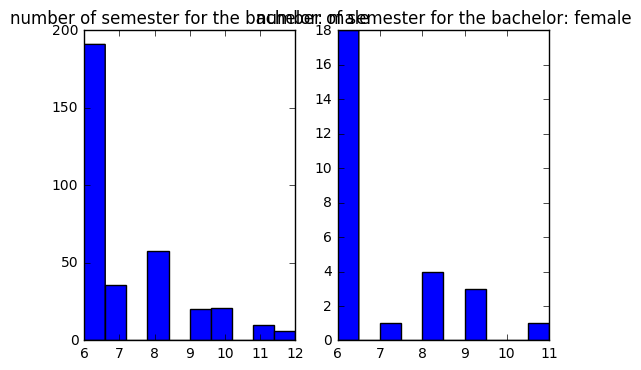

In [118]:
# analyse the difference between boys and girls
sex=Data_Bachelor_Clean.groupby(['Civilité'])

# basic informations:
print(sex.describe())

# there were only 27 females completing the masters against 342 males

# keep the duration of the study for both groups
male=np.array(sex.get_group('Monsieur')['Durée'])
female=np.array(sex.get_group('Madame')['Durée'])

plt.figure()
plt.subplot(121)
plt.hist(male)
plt.title('number of semester for the bachelor: male')
plt.subplot(122)
plt.hist(female)
plt.title('number of semester for the bachelor: female')
#most people finished their bachelor in 6 semesters (3 years)


# perform the statistics to check if there is a difference in the duration
# we use the ttest because we compare two populations and want to find out if there
# is a significant difference in their mean value

stats.ttest_ind(a= female, b= male, equal_var=False)
# there is no statitically significant difference between male and female in the duration of the bachelor
# the p-value is 0.34 which is not significant (significance if lower than 0.05)

In [119]:
# ANALYSIS OF THE MASTERS DATA:
Data_Master=pd.DataFrame([])
#load the data
for i in range(2007,2017):
    #compute the academic period
    periode_ac=str(i)+'-'+str(i+1)

    # define the semester: 1 to 3 for the Masters

    for sem in range(1,4):

        Data=pd.read_pickle('Master_sem_'+str(sem)+'_'+periode_ac)

        #add columns with the year and type of semester
        Data['Year']=periode_ac
        Data['Semester']=sem
        #concatenate with the previously loaded data
        Data_Master=pd.concat([Data_Master,Data])
    
    ## add the masters project: consider it as semester 4
    
    # add the autumn masters projects
    Data=pd.read_pickle('Projet Master automne'+periode_ac)

    #add columns with the year and type of semester
    Data['Year']=periode_ac
    Data['Semester']=4
    #concatenate with the previously loaded data
    Data_Master=pd.concat([Data_Master,Data])
    
    #add the spring masters projects: Problem: there was no data for last 3 years: check that the data exists first
    my_file='Projet Master printemps'+periode_ac
    if os.path.isfile(my_file):
        Data=pd.read_pickle(my_file)

        #add columns with the year and type of semester
        Data['Year']=periode_ac
        Data['Semester']=4 #we also put 4 because we don't really care about the semester of the
        #master project for this analysis as long as they did it
        #concatenate with the previously loaded data
        Data_Master=pd.concat([Data_Master,Data])
        
#reshape the data: keep only interesting information       
Data_Master=Data_Master.drop(Data_Master.columns[[2,3,5,7,8,9,10]],axis=1)
Data_Master=Data_Master.reset_index()
Data_Master

,No Sciper,Civilité,Nom Prénom,Spécialisation,Mineur,Year,Semester
0,153066,Monsieur,Aeberhard François-Xavier,NaN,NaN,2007-2008,1
1,180027,Madame,Agarwal Megha,NaN,NaN,2007-2008,1
2,152232,Monsieur,Anagnostaras David,NaN,NaN,2007-2008,1
3,177395,Monsieur,Auroux Damien,NaN,NaN,2007-2008,1
4,161970,Monsieur,Awalebo Joseph,NaN,NaN,2007-2008,1
5,166258,Monsieur,Balet Ken,NaN,NaN,2007-2008,1
6,173600,Monsieur,Barazzutti Raphaël Pierre,NaN,NaN,2007-2008,1
7,178879,Monsieur,Bayramoglu Ersoy,NaN,NaN,2007-2008,1
8,154573,Madame,Benabdallah Zeineb,NaN,NaN,2007-2008,1
9,160492,Monsieur,Bettex Marc,NaN,NaN,2007-2008,1


In [59]:
# Group the data by sciper number: one sciper identifies one person.
#when we group we will have the info on all the semesters each person took
Grouped_data=Data_Master.groupby(['No Sciper'])

#The basic statistics give us the number of semester the person did (in count), the 1st semester he did
# (in min) and the last semester he did (in max)
Stats=Grouped_data.describe()


def get_civilite(NoSciper,Data):
    # Function to obtain the sex of a given student 
    Data= Data.rename(columns= {'No Sciper':'NoSciper'}) # Rename column not to have blanks
    civilite = np.array(Data[Data.NoSciper == student].Civilité)[0]
    return civilite
    
# Create empty data frame where we will put all info about students that have completed their bachelors
Data_Master_Clean = pd.DataFrame() 

# Extract information (study duration and sex) of students that have finished their problems
all_students = set(Data_Master['No Sciper'])  # get a list of all the students (unique list, so no student ids are repeated)
for student in all_students:  # iterate across all students
    if type(student) == int or type(student)==str:  # not do analysis if sciper is NaN
        student_info = Stats.loc[student] # get stats info about a given student (counts, mean...)
        # if max registered semester is 6 and min registered semester is 1, obtain infor about student
        if (float(student_info.loc['max'] == 6)) and (float(student_info.loc['min'] == 1)):
            student_DF = pd.DataFrame({'No Sciper': student, 'Durée':student_info.loc['count'], 'Civilité': get_civilite(student,Data_Master)})
            Data_Master_Clean = Data_Master_Clean.append(student_DF) # append dataframe of student to general data frame 

Data_Master_Clean.set_index('No Sciper')

Semester
No Sciper                
128911    count  2.000000
          mean   2.500000
          std    0.707107
          min    2.000000
          25%    2.250000
          50%    2.500000
          75%    2.750000
          max    3.000000
129093    count  2.000000
          mean   2.500000
          std    0.707107
          min    2.000000
          25%    2.250000
          50%    2.500000
          75%    2.750000
          max    3.000000
129326    count  2.000000
          mean   2.500000
          std    0.707107
          min    2.000000
          25%    2.250000
          50%    2.500000
          75%    2.750000
          max    3.000000
138088    count  1.000000
          mean   1.000000
          std         NaN
          min    1.000000
          25%    1.000000
          50%    1.000000
...                   ...
273163    std         NaN
          min    1.000000
          25%    1.000000
          50%    1.000000
          75%    1.000000
          max    1.000000
273182    count  1.000000
          mean   1.000000
          std         NaN
          min    1.000000
          25%    1.000000
          50%    1.000000
          75%    1.000000
          max    1.000000
273251    count  1.000000
          mean   1.000000
          std         NaN
          min    1.000000
          25%    1.000000
          50%    1.000000
          75%    1.000000
          max    1.000000
273563    count  1.000000
          mean   1.000000
          std         NaN
          min    1.000000
          25%    1.000000
          50%    1.000000
          75%    1.000000
          max    1.000000

[7816 rows x 1 columns]